In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from bs4 import BeautifulSoup
sns.set()
%matplotlib inline
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

In [2]:
df = pd.read_csv("data/fifa19.zip")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [5]:
df['Value'] = df['Value'].str.replace('€', '')

In [6]:
df['Value'].head()

0    110.5M
1       77M
2    118.5M
3       72M
4      102M
Name: Value, dtype: object

In [7]:
df['Value'].isna().count()

18207

In [8]:
df['Value'] = (df['Value'].replace(r'[KM]+$', '', regex=True).astype(float) * df['Value'].str.extract(r'[\d\.]+([KM]+)', expand=False).dropna().replace(['K','M'], [10**3, 10**6]).astype(int))

In [9]:
df['Value'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [10]:
df['Release Clause'] = df['Release Clause'].str.replace('€', '')

In [11]:
df['Release Clause'] = (df['Release Clause'].replace(r'[KM]+$', '', regex=True).astype(float) * df['Release Clause'].str.extract(r'[\d\.]+([KM]+)', expand=False).dropna().replace(['K','M'], [10**3, 10**6]).astype(int))

In [12]:
df['Wage'] = df['Wage'].str.replace('€', '')

In [13]:
df['Wage'] = (df['Wage'].replace(r'[KM]+$', '', regex=True).astype(float) * df['Wage'].str.extract(r'[\d\.]+([KM]+)', expand=False).dropna().replace(['K','M'], [10**3, 10**6]).astype(int))

In [14]:
df['Position'].head()

0     RF
1     ST
2     LW
3     GK
4    RCM
Name: Position, dtype: object

In [15]:
df['SimplifiedPosition'] = df['Position'].replace({'GK': 'GoalKeeper',
                                                  'LWB': 'Defender', 'RWB': 'Defender', 'LB': 'Defender', 'LCB': 'Defender', 'CB': 'Defender', 'RCB': 'Defender', 'RB': 'Defender',
                                                  'LAM': 'Midfielder', 'CAM': 'Midfielder', 'RAM': 'Midfielder', 'LM': 'Midfielder', 'LCM': 'Midfielder', 'CM': 'Midfielder', 'RCM': 'Midfielder', 'RM': 'Midfielder', 'LDM': 'Midfielder', 'CDM': 'Midfielder', 'RDM': 'Midfielder',
                                                  'LS': 'Attacker', 'ST': 'Attacker', 'RS': 'Attacker', 'LW': 'Attacker', 'LF': 'Attacker', 'CF': 'Attacker', 'RF': 'Attacker', 'RW': 'Attacker'})

In [16]:
pos = df['SimplifiedPosition'].value_counts()

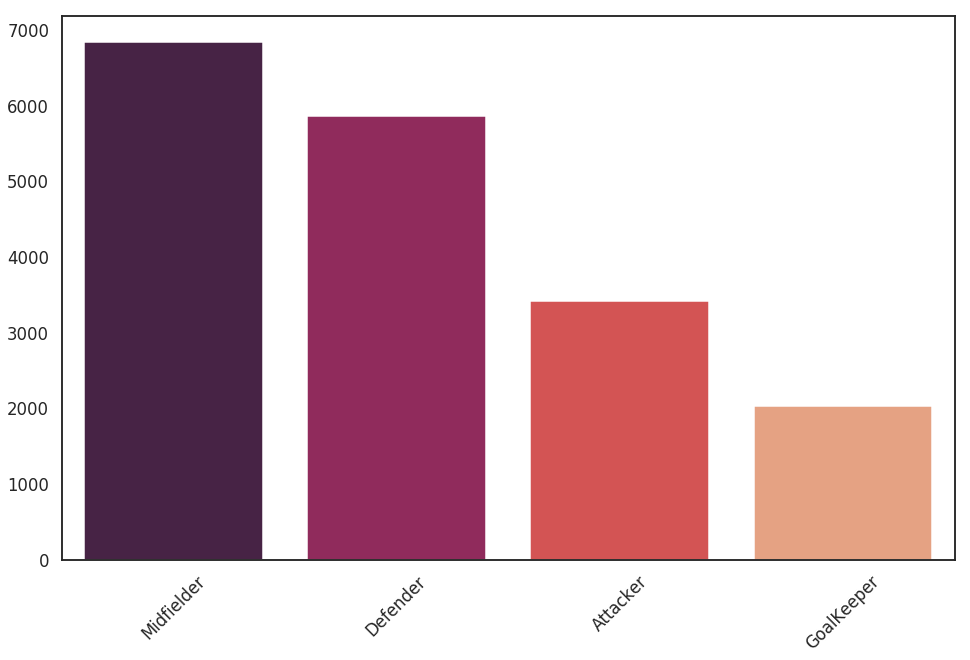

In [17]:
sns.barplot(x=pos.index, y=pos.values,palette="rocket")

plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

In [18]:
df[['Contract Valid Until', 'Joined']].apply(pd.to_datetime).head()

,Contract Valid Until,Joined
0,2021-01-01,2004-07-01
1,2022-01-01,2018-07-10
2,2022-01-01,2017-08-03
3,2020-01-01,2011-07-01
4,2023-01-01,2015-08-30


In [19]:
pd.to_datetime(df['Joined']).head()

0   2004-07-01
1   2018-07-10
2   2017-08-03
3   2011-07-01
4   2015-08-30
Name: Joined, dtype: datetime64[ns]

In [20]:
best_wage = df['Wage'].groupby(df['Name']).max().sort_values(ascending=False).head(10)

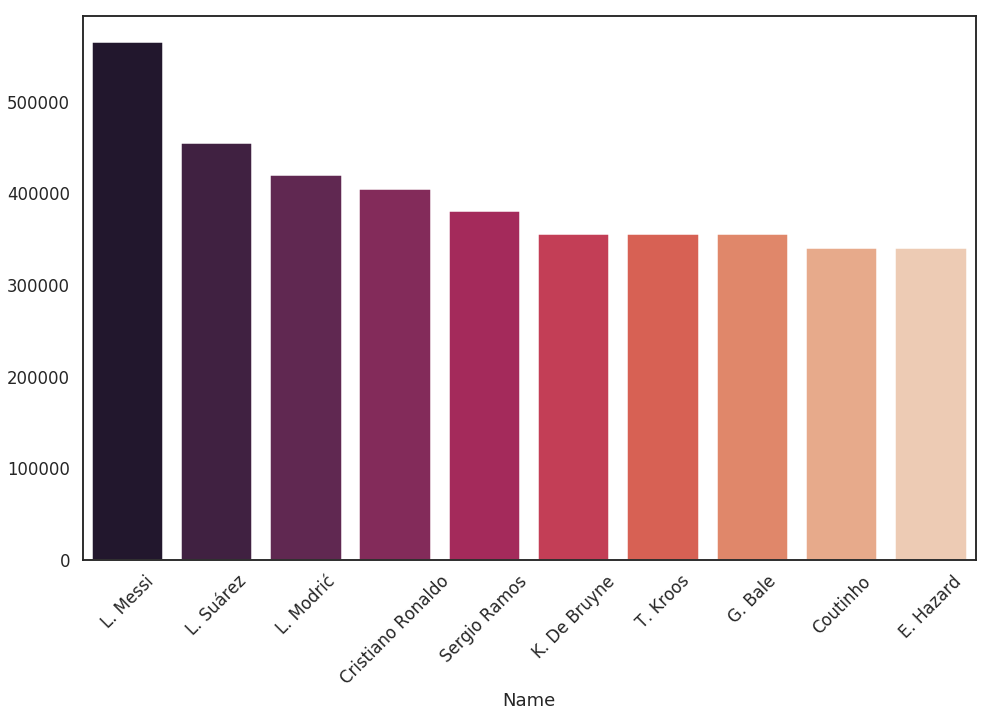

In [21]:
sns.barplot(x=best_wage.index, y=best_wage.values,palette="rocket")

plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

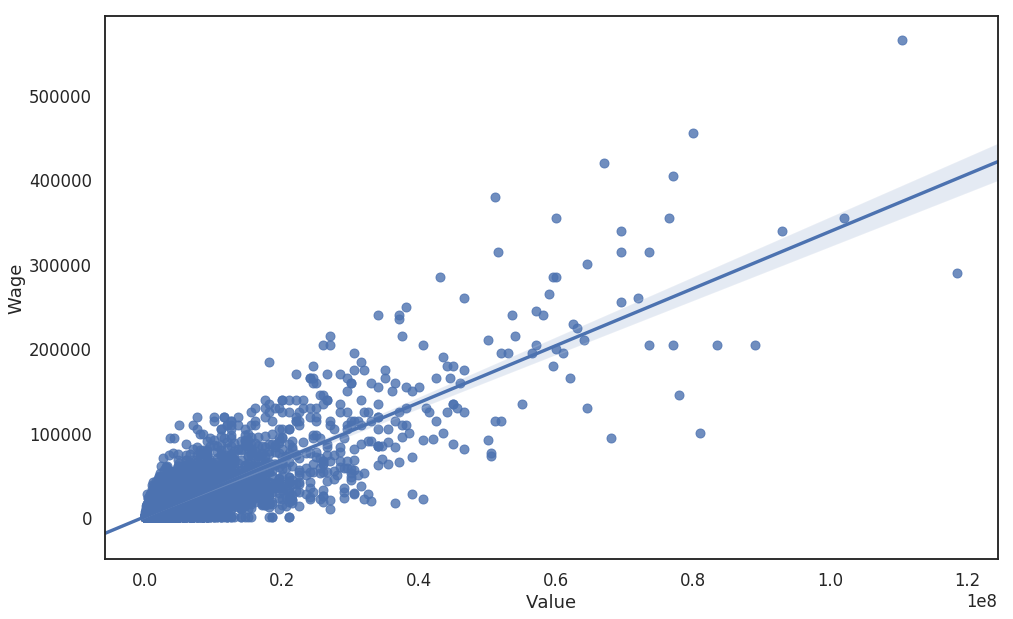

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 10)
sns.regplot(x="Value", y="Wage", data=df)

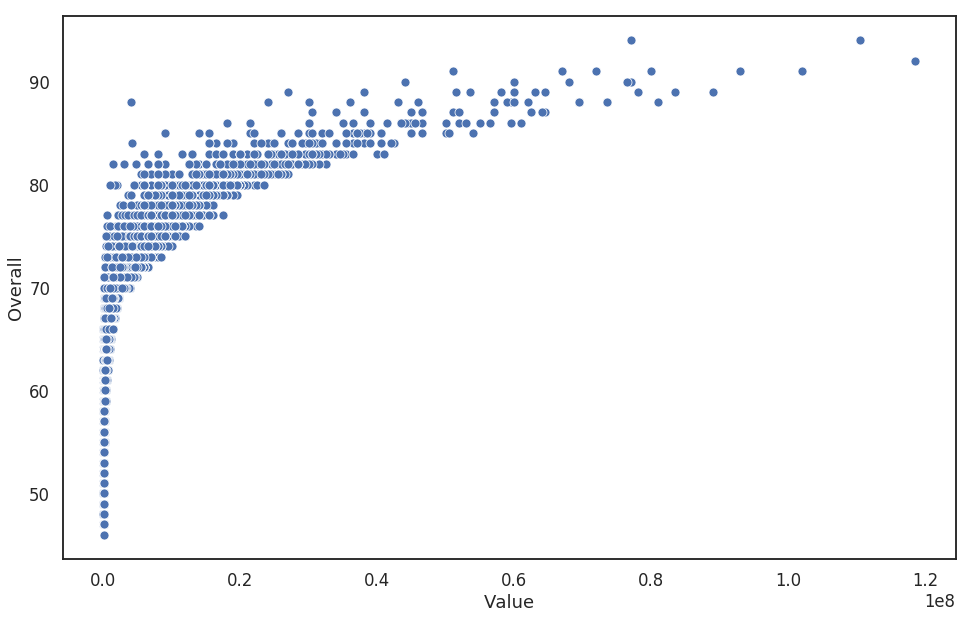

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 10)
sns.scatterplot(x="Value", y="Overall", data=df)

In [24]:
top_val = df['Value'].groupby(df['Nationality']).sum().sort_values(ascending=False).head(10)

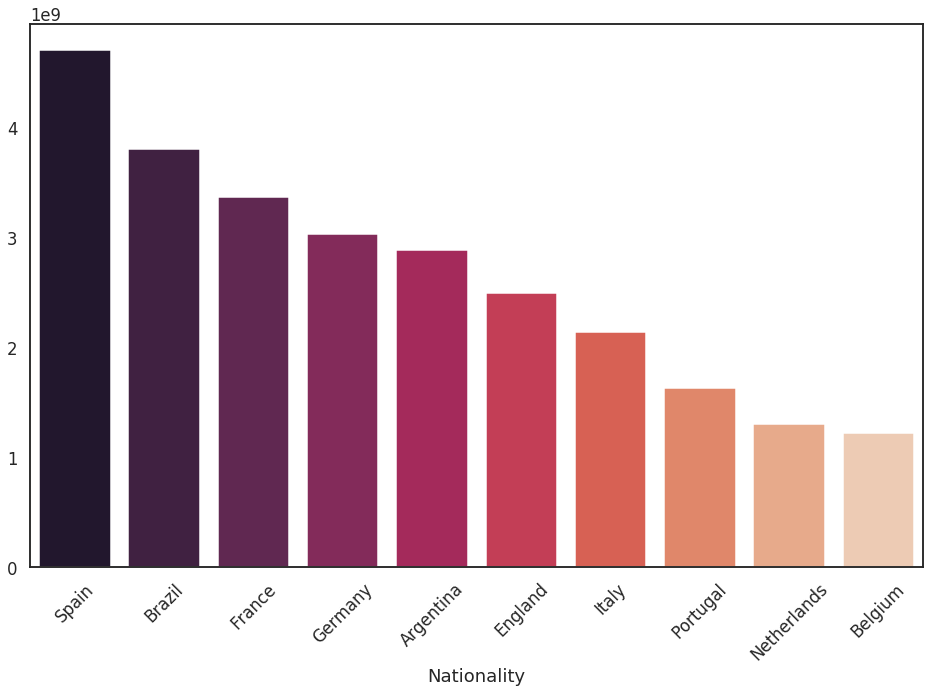

In [25]:
sns.barplot(x=top_val.index, y=top_val.values,palette="rocket")

plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

In [26]:
top_clubs = df['Value'].groupby(df['Club']).sum().sort_values(ascending=False).head(10)

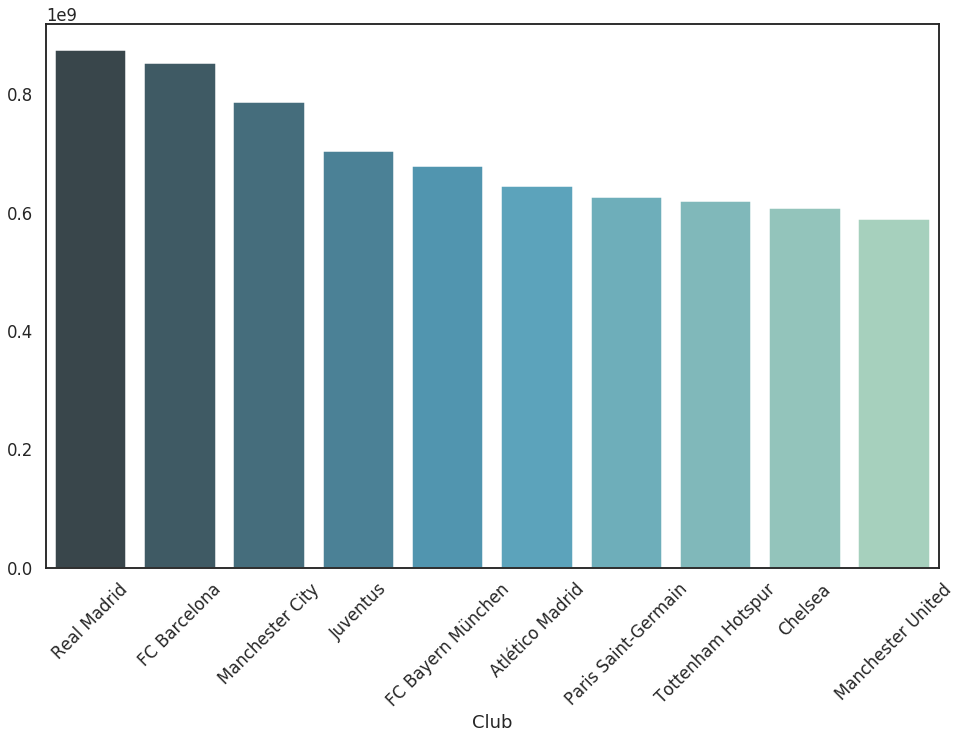

In [27]:

sns.barplot(x=top_clubs.index, y=top_clubs.values,palette="GnBu_d")

plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)



In [28]:
top_clubs_90 = df['Value'].groupby(df['Club']).quantile(0.9).sort_values(ascending=False).head(10)

In [29]:
top_clubs_90

Club
Manchester City        59900000.0
Real Madrid            59900000.0
FC Barcelona           57800000.0
Paris Saint-Germain    55500000.0
Napoli                 45900000.0
FC Bayern München      45600000.0
Juventus               45500000.0
Atlético Madrid        44800000.0
Liverpool              42900000.0
Manchester United      41500000.0
Name: Value, dtype: float64

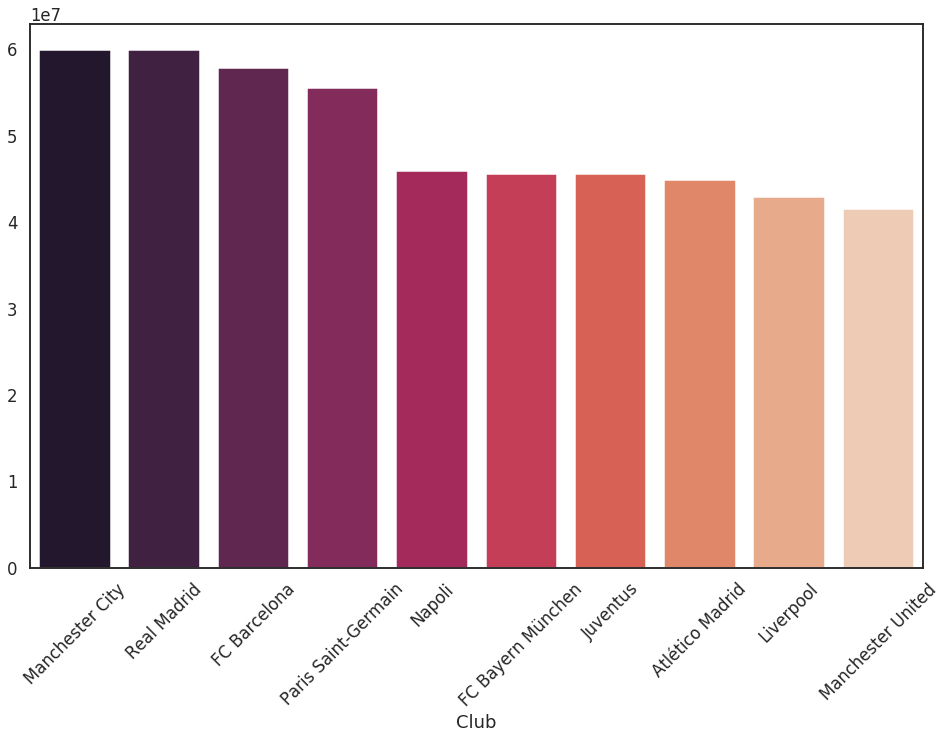

In [30]:
sns.barplot(x=top_clubs_90.index, y=top_clubs_90.values,palette="rocket")

plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

In [31]:
df['Highest potential'] = df['Potential'] - df['Overall']

In [32]:
Highest_potential_players = df['Highest potential'].groupby(df['Name']).max().sort_values(ascending=False).head(10)

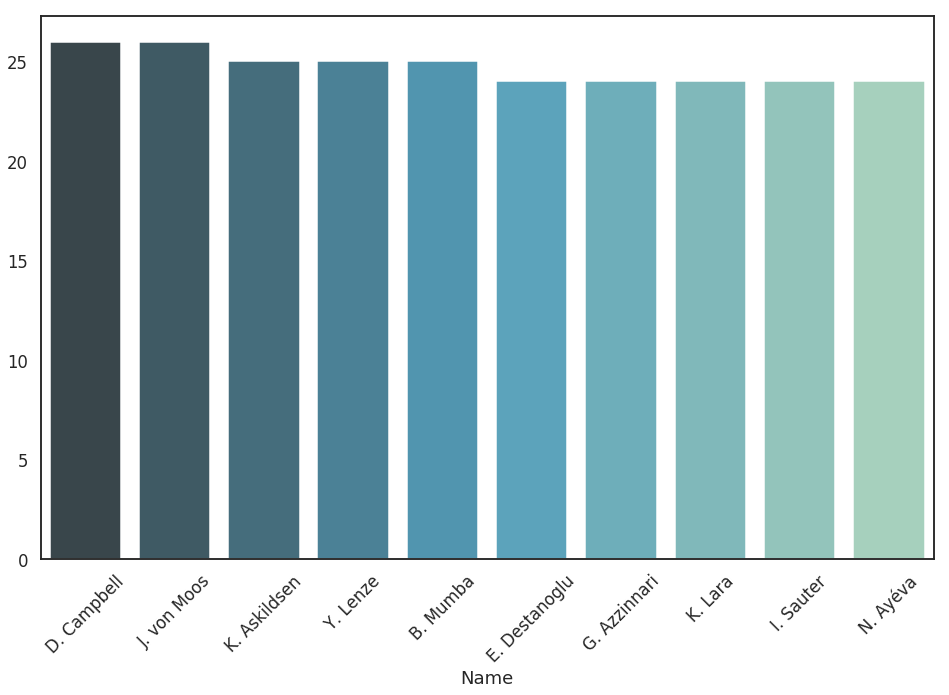

In [33]:
sns.barplot(x=Highest_potential_players.index, y=Highest_potential_players.values,palette="GnBu_d")
plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)


In [34]:
over_90 = df[df['Potential'] > 90]

In [35]:
High_player_over_90 = over_90.sort_values('Highest potential', ascending=False).head(10)['Name']

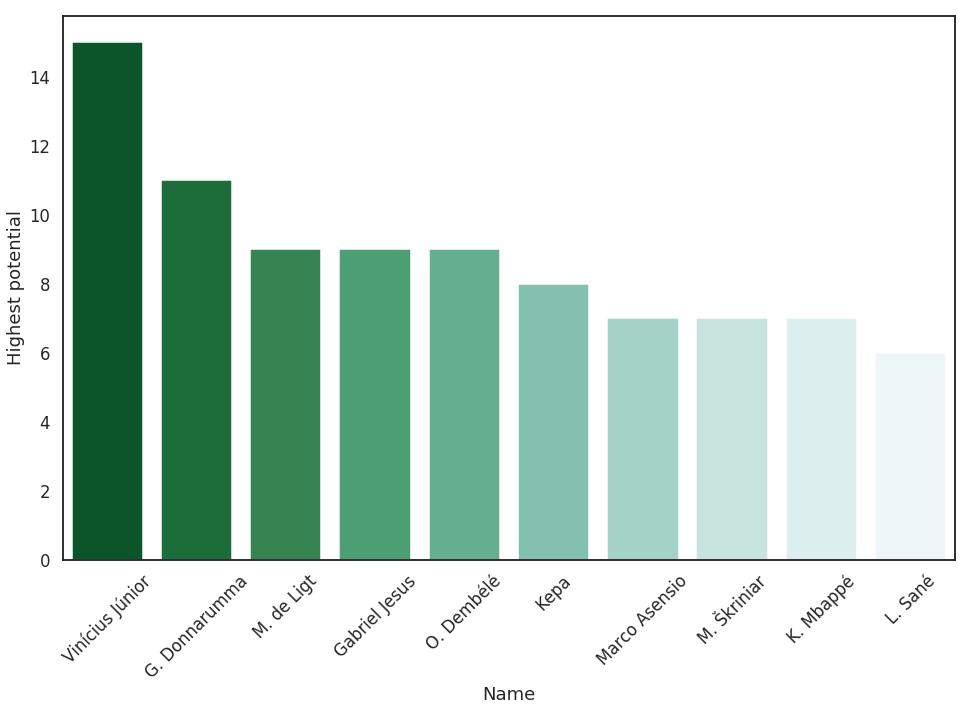

In [36]:
sns.barplot(x=High_player_over_90, y=over_90['Highest potential'],palette="BuGn_r")
plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

In [37]:
most_loaned = df['Loaned From'].value_counts().sort_values(ascending=False).head(10)

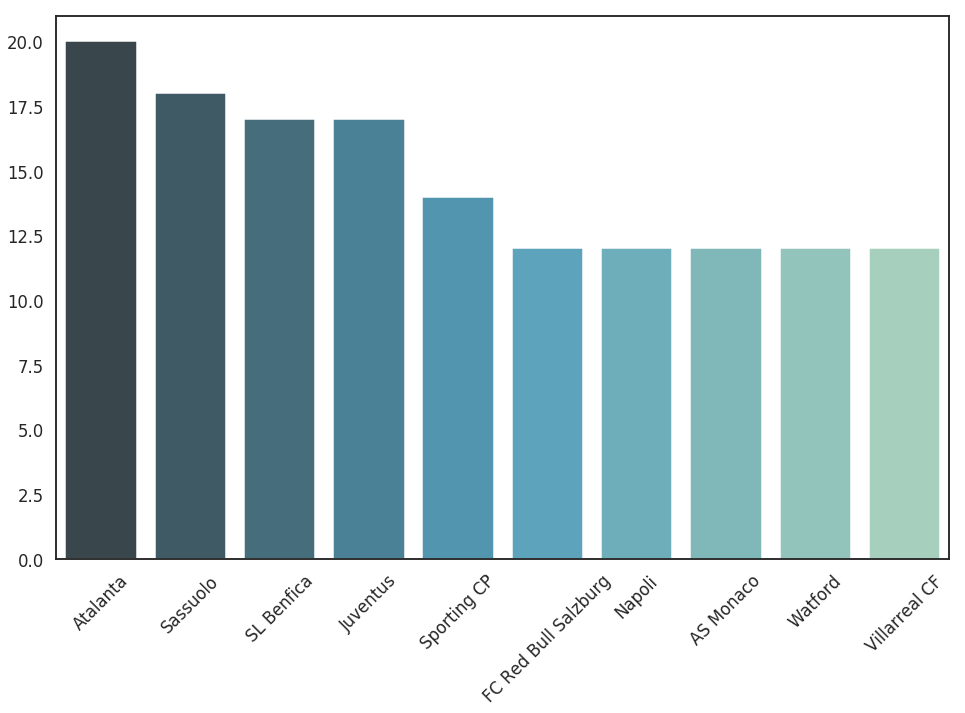

In [38]:
sns.barplot(x=most_loaned.index, y=most_loaned.values ,palette="GnBu_d")
plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

In [39]:
def plot_radar(name='L. Messi', name2='Cristiano Ronaldo', feat=['Dribbling', 'BallControl', 'Acceleration', 'ShotPower', 'Vision']):

    labels=np.array(feat)
    stats= df[df['Name']==name][labels].values.flatten().tolist()
    stats2 = df[df['Name']==name2][labels].values.flatten().tolist()

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles2=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    stats2=np.concatenate((stats2,[stats2[0]]))
    angles2=np.concatenate((angles2,[angles2[0]]))

    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)


    ax.plot(angles, stats, 'o-', linewidth=2, label=name)
    ax.fill(angles, stats, alpha=0.25)

    ax.plot(angles2, stats2, 'o-', linewidth=2, label=name2)
    ax.fill(angles2, stats2, alpha=0.25)


    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title("Compare SkillZ")
    ax.grid(True)

    ax.legend(loc=(1, 1))
    fig = plt.gcf()
    fig.set_size_inches( 16, 10)

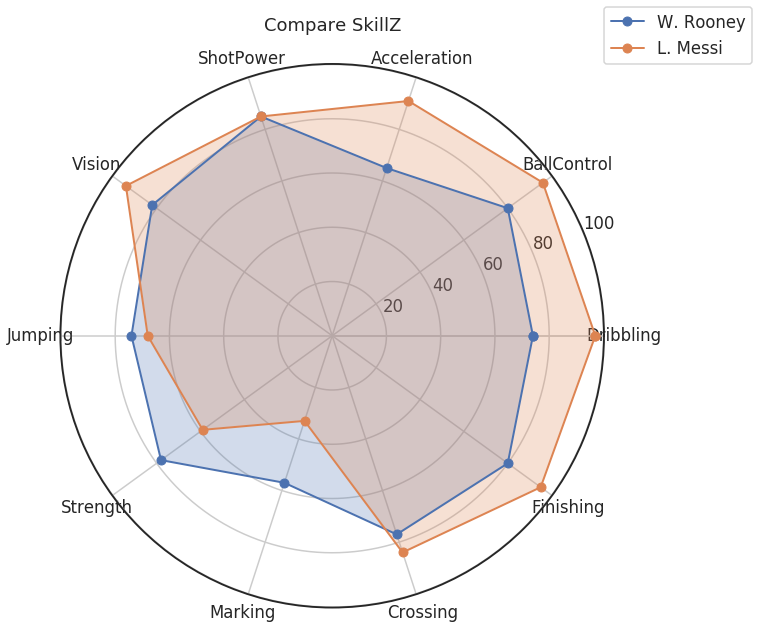

In [40]:
plot_radar('W. Rooney', 'L. Messi', feat=['Dribbling', 'BallControl', 'Acceleration', 'ShotPower', 'Vision', 'Jumping', 'Strength', 'Marking', 'Crossing', 'Finishing'])

In [41]:
important_cols = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy','LongPassing', 'BallControl',
                  'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina','Strength', 'LongShots', 'Aggression',
                  'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
heat = pd.DataFrame(df, columns=important_cols)

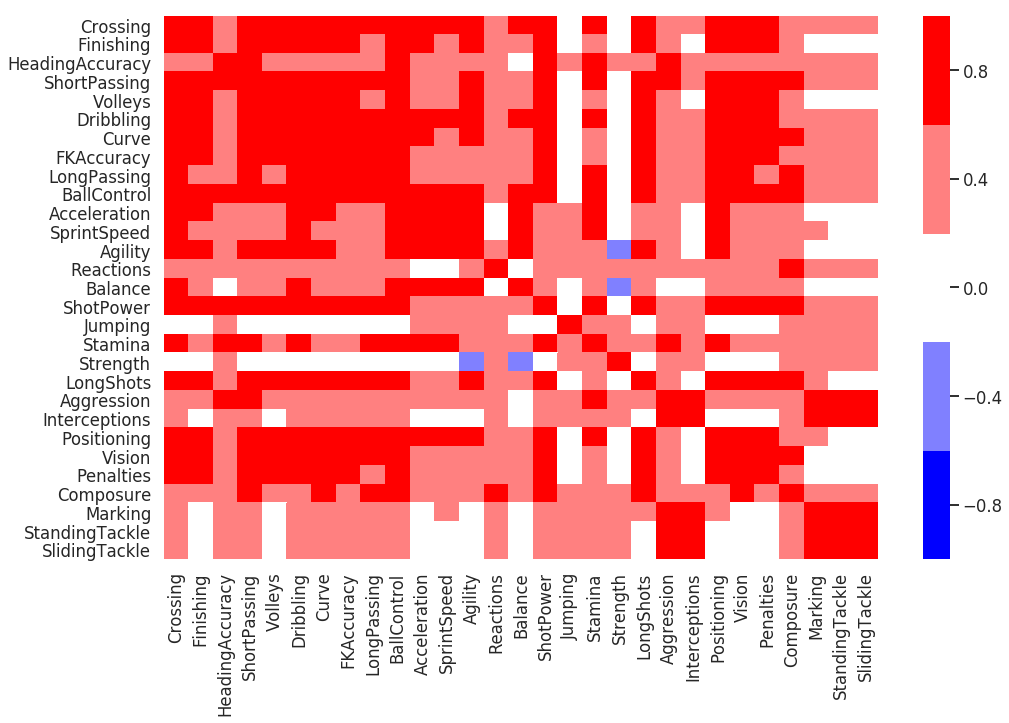

In [42]:
cmap = plt.cm.get_cmap("bwr",lut=5) 
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.heatmap(heat.corr().values, vmin=-1., vmax=1.,
            cmap=cmap,
            xticklabels=list(heat.columns),
            yticklabels=list(heat.columns))

In [43]:
df['Weight_clean'] = df['Weight'].str.replace('lbs', '').astype(float)

In [44]:
df['Height_clean'] = df['Height'].str.replace("'", '.').astype(float)

In [45]:
df2 = pd.DataFrame(df, columns=['Age', 'Special', 'Potential', 'Wage', 'Value', 'Weight_clean', 'Height_clean', 'Overall'])

In [46]:
df2.dropna(inplace=True)

In [47]:
df2_stnd = (df2 - df2.mean()) / df2.std() 

df2_stnd.head()

,Age,Special,Potential,Wage,Value,Weight_clean,Height_clean,Overall
0,1.266932,2.212780,3.692984,25.063022,19.180881,-0.446358,-0.216334,4.007674
1,1.696081,2.308071,3.692984,17.839107,13.234002,1.091854,0.898768,4.007674
2,0.194060,1.996542,3.530045,12.646918,20.601031,-1.023188,0.229707,3.718941
3,0.408634,-0.466368,3.530045,11.292434,12.346408,0.130471,1.344809,3.574575
4,0.408634,2.502318,3.367105,15.581634,17.671971,-0.766819,-1.532154,3.574575


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

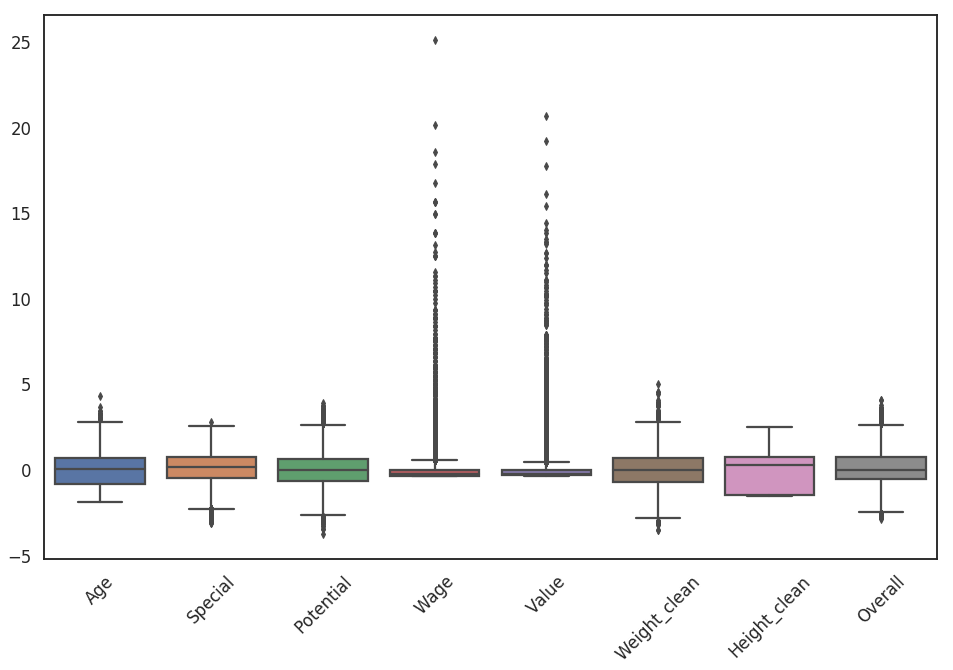

In [48]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.boxplot(data=df2_stnd)
plt.xticks(rotation=45)

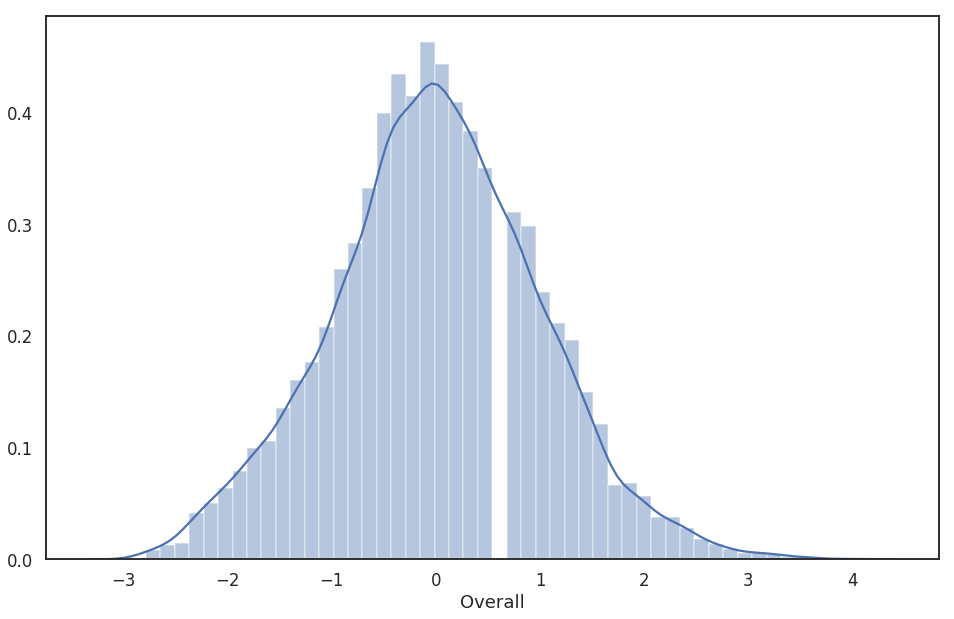

In [49]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.distplot(df2_stnd['Overall'])

In [50]:
df2_stnd.corr().round(4)

,Age,Special,Potential,Wage,Value,Weight_clean,Height_clean,Overall
Age,1.0000,0.2414,-0.2507,0.1451,0.0785,0.2297,0.0532,0.4566
Special,0.2414,1.0000,0.3836,0.3502,0.3804,-0.2672,-0.2960,0.6084
Potential,-0.2507,0.3836,1.0000,0.4893,0.5799,-0.0070,0.0154,0.6604
Wage,0.1451,0.3502,0.4893,1.0000,0.8580,0.0657,0.0239,0.5761
Value,0.0785,0.3804,0.5799,0.8580,1.0000,0.0467,0.0136,0.6317
Weight_clean,0.2297,-0.2672,-0.0070,0.0657,0.0467,1.0000,0.4520,0.1546
Height_clean,0.0532,-0.2960,0.0154,0.0239,0.0136,0.4520,1.0000,0.0414
Overall,0.4566,0.6084,0.6604,0.5761,0.6317,0.1546,0.0414,1.0000


In [51]:
variables = df2_stnd.columns[ : -1]
X = df2_stnd[variables].values

target = df2_stnd.columns[-1]
y = df2_stnd[target].values

y[1]

4.0076743052079

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12534, 7) (12534,)
(5373, 7) (5373,)


In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Mean Absolute Error (MAE): 0.25784614158283753
Variance score (R^2): 0.8921387715478208


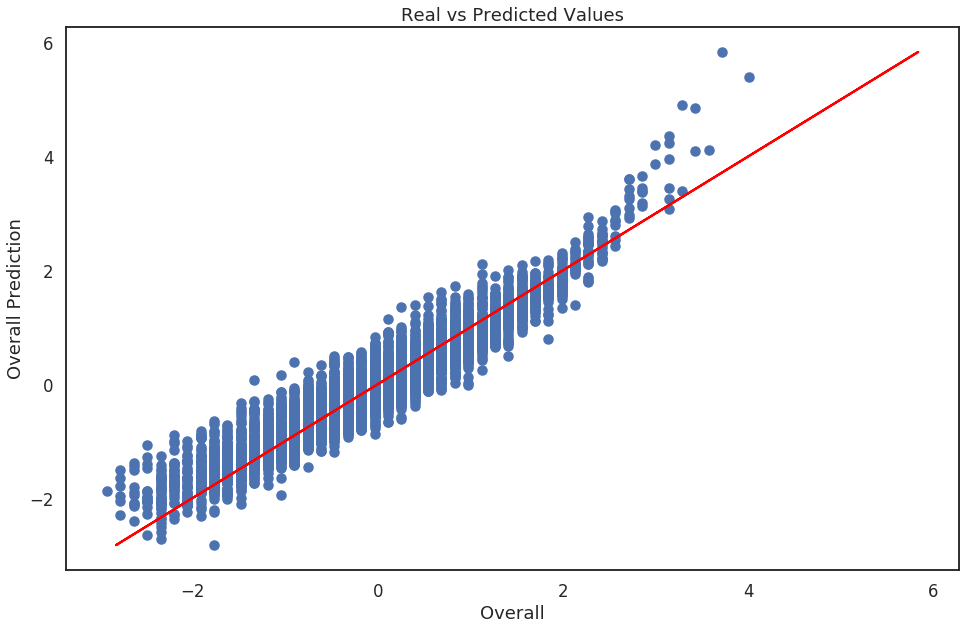

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score
fig = plt.gcf()
fig.set_size_inches( 16, 10)

y_pred = lr.predict(X_test)

print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, y_pred)))
print('Variance score (R^2): {}'.format(r2_score(y_test, y_pred)))

plt.title('Real vs Predicted Values')
plt.xlabel('Overall')
plt.ylabel('Overall Prediction')

plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, color='red')

In [55]:
df[df['Position'].isna()]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,SimplifiedPosition,Highest potential,Weight_clean,Height_clean
5018,5018,153160,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,https://cdn.sofifa.org/flags/53.png,70,70,NaN,...,16.0,8.0,11.0,12.0,13.0,NaN,NaN,0,172.0,5.11
6736,6736,175393,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,https://cdn.sofifa.org/flags/53.png,68,68,NaN,...,16.0,13.0,15.0,16.0,8.0,NaN,NaN,0,154.0,5.90
7922,7922,195905,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,https://cdn.sofifa.org/flags/53.png,67,67,NaN,...,11.0,7.0,8.0,12.0,12.0,NaN,NaN,0,190.0,5.11
9905,9905,226044,R. Vargas,23,https://cdn.sofifa.org/players/4/19/226044.png,Bolivia,https://cdn.sofifa.org/flags/53.png,66,69,NaN,...,13.0,11.0,11.0,7.0,9.0,NaN,NaN,3,143.0,5.70
10628,10628,216751,D. Bejarano,26,https://cdn.sofifa.org/players/4/19/216751.png,Bolivia,https://cdn.sofifa.org/flags/53.png,65,66,NaN,...,14.0,12.0,11.0,14.0,12.0,NaN,NaN,1,154.0,5.90
13236,13236,177971,J. McNulty,33,https://cdn.sofifa.org/players/4/19/177971.png,Scotland,https://cdn.sofifa.org/flags/42.png,62,62,Rochdale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
13237,13237,195380,J. Barrera,29,https://cdn.sofifa.org/players/4/19/195380.png,Nicaragua,https://cdn.sofifa.org/flags/86.png,62,62,Boyacá Chicó FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
13238,13238,139317,J. Stead,35,https://cdn.sofifa.org/players/4/19/139317.png,England,https://cdn.sofifa.org/flags/14.png,62,62,Notts County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
13239,13239,240437,A. Semprini,20,https://cdn.sofifa.org/players/4/19/240437.png,Italy,https://cdn.sofifa.org/flags/27.png,62,72,Brescia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN
13240,13240,209462,R. Bingham,24,https://cdn.sofifa.org/players/4/19/209462.png,England,https://cdn.sofifa.org/flags/14.png,62,66,Hamilton Academical FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
